_Workshop 4, Advanced AI - Statistics Module_

**Name: Jaime Lopez Hernandez**

_Date: 23/08/2023_


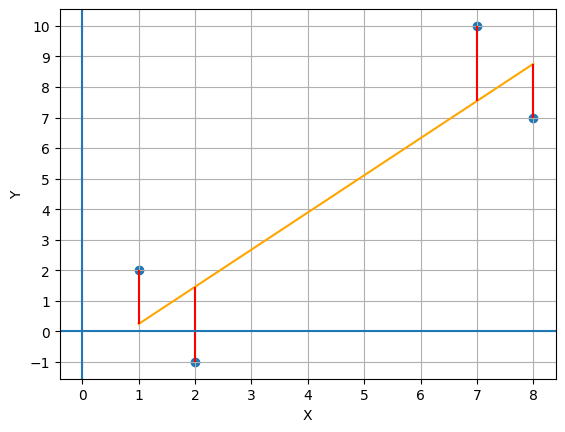

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
data = {'x':  [1,2,7,8],
        'y': [2,-1,10,7]}
df = pd.DataFrame(data)
b1,b0 = np.polyfit(df.x,df.y,1)
df['yhat'] = b0 + b1*df['x']
#plt.clf()
plt.scatter(df.x,df.y)
plt.plot(df.x, df.yhat,c="orange")
plt.xticks(np.arange(-4,14,1))
plt.yticks(np.arange(-2,11,1))

for i in range(4):
  x=df.x.iloc[i]
  ymin= df.y.iloc[i]
  ymax=df.yhat.iloc[i]
  if (ymin>ymax):
    temp=ymax
    ymax=ymin
    ymin=temp
  plt.vlines(x=x,ymin=ymin,ymax=ymax,color='r')

plt.axhline(y=0)
plt.axvline(x=0)

plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

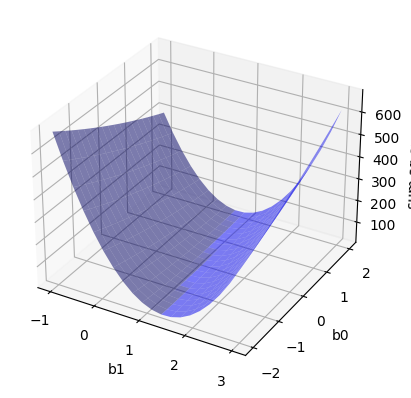

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
# I define a function to get the sum of squared errors given a specific b0 and b1 coefficients:
def sumsqerrors2(b1, b0,df):
    return sum( ( df.y - (b0+b1*df.x)) **2)
# Note that df is a dataframe, so this line of code performs a row-wise operation to avoid
#   writing a loop to sum each squared error for each observation

# Create the plot:
fig = plt.figure()

ax = fig.add_subplot(1,1,1, projection='3d')
# I create 20 possible values of beta0 and beta1:
# beta1 will move between -1 and 3
b1s = np.linspace(-1, 3.0, 20)
# beta0 will move between -2 and 2:
b0s = np.linspace(-2, 2, 20)
# I create a grid with all possible combinations of beta0 and beta1 using the meshgrid function:
# M will be all the b1s values, and B the beta0 values:
M, B = np.meshgrid(b1s, b0s)
# I calculate the sum of squared errors with all possible pairs of beta0 and beta1 of the previous grid:
zs = np.array([sumsqerrors2(mp, bp, df)
        for mp, bp in zip(np.ravel(M), np.ravel(B))])
# I reshape the zs (squared errors) from a vector to a grid of the same size as M (20x20)
Z = zs.reshape(M.shape)

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)

ax.set_xlabel('b1')
ax.set_ylabel('b0')
ax.set_zlabel('sum sq.errors')

plt.show()

# 6 CHALLENGE: Estimate a market regression model

In [4]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import yfinance as yf

# List of tickers
tickers = ["ALFAA.MX", "^MXX"]

# Getting price data and selecting adjusted price columns:
sprices=yf.download(tickers=tickers, start="2018-01-01", end="2022-07-21",interval="1mo")
sprices = sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()
sr.columns=['ALFAAret','MXXret']
sr.head()

[*********************100%%**********************]  2 of 2 completed


,ALFAAret,MXXret
Date,,
2018-02-01,-0.042411,-0.061683
2018-03-01,0.040844,-0.028070
2018-04-01,0.030446,0.047283
2018-05-01,-0.159022,-0.079500
2018-06-01,0.120384,0.065024


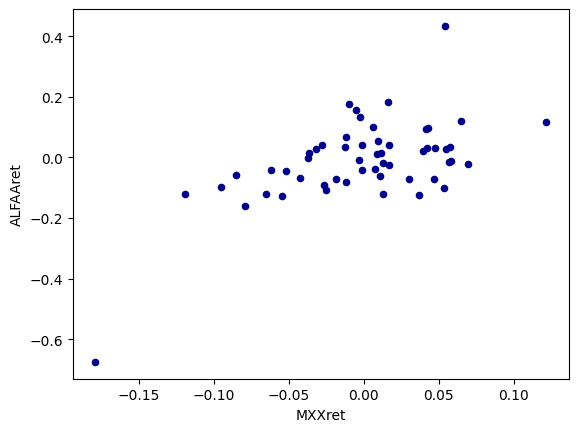

In [5]:
sr.plot.scatter(x='MXXret', y='ALFAAret',c='DarkBlue')
plt.show()

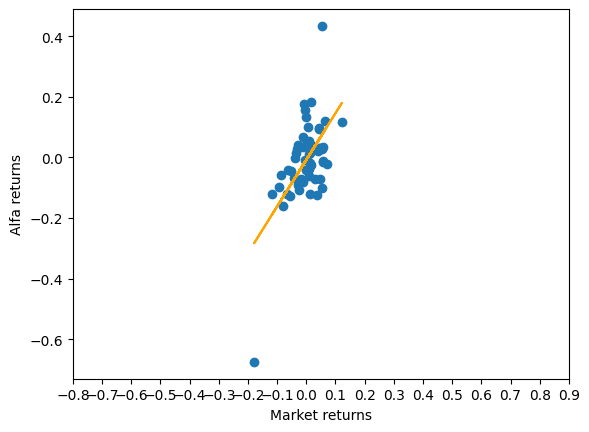

In [6]:
plt.clf()
x=sr['MXXret']
y = sr['ALFAAret']
plt.scatter(x, y)
# Now I add the regression line:
# The polyfit function actually calculates the beta0 and beta1 of the linear regression line:
b1,b0 = np.polyfit(x,y,1)
# With the beta coefficients I calculated the predicted line (yfit)
yfit = b0+b1*x
plt.plot(x, yfit,c="orange")
# I change the range for X trying to make both axis moving in the same range:
plt.xticks(np.arange(-0.80,1,0.1))
# I label the axis:
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

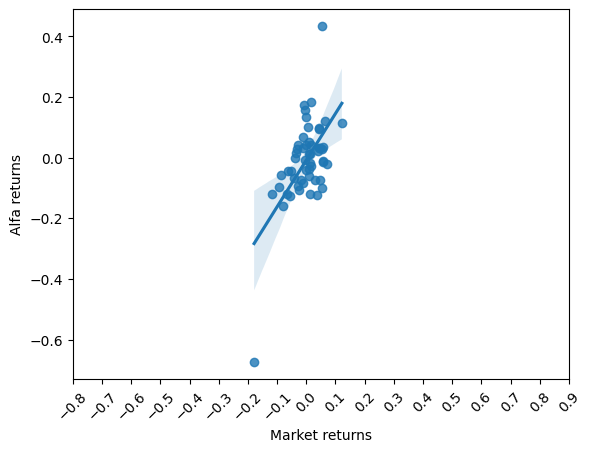

In [23]:
# Another faster way to plot a scatter and the regression line:
# I use the seaborn library:

X=sr['MXXret'].values
Y = sr['ALFAAret'].values
import seaborn as sns
plt.clf()
sns.regplot(x = X, y = Y)
plt.xticks(np.arange(-0.80, 1, 0.1), rotation=45)  # Adjust the rotation angle
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

In [8]:
import statsmodels.api as sm
# I add a column of 1's to the X dataframe in order to include the beta0 coefficient (intercept) in the model:
X = sm.add_constant(x)
# I estimate the OLS regression model:
mkmodel = sm.OLS(y,X).fit()
# I display the summary of the regression:
print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:               ALFAAret   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     28.13
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           2.36e-06
Time:                        00:42:48   Log-Likelihood:                 42.633
No. Observations:                  54   AIC:                            -81.27
Df Residuals:                      52   BIC:                            -77.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0080      0.015     -0.522      0.6

In [9]:
# I can also run the OLS regression using the ols function
import statsmodels.formula.api as smf

mkmodel2 = smf.ols('ALFAAret ~ MXXret',data=sr).fit()
# This function does not require to add the column of 1's to include the intercept!
print(mkmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:               ALFAAret   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     28.13
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           2.36e-06
Time:                        00:42:48   Log-Likelihood:                 42.633
No. Observations:                  54   AIC:                            -81.27
Df Residuals:                      52   BIC:                            -77.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0080      0.015     -0.522      0.6

In [10]:
# Using matrix algebra to estimate the beta coefficients:
# I add the column of 1's to the dataframe:
sr['constant'] = 1
selcols = ['constant','MXXret']
# I set x as a matrix with the column of 1's and the values of X:
x = sr[selcols].values
# I set y as the dependent variable:
y = sr['ALFAAret'].values
# I calculate the matrix multiplication X'X:
xtx = np.matmul(x.transpose(),x)
# I calculate the matrix multiplication X'Y:
xty = np.matmul(x.transpose(),y)
# I get the inverse of the matrix (X'X) to solve for the beta coefficients:
invtxt = np.linalg.inv(xtx)
# I multiply inv(X'X)*X'Y to get the estimation of the beta vector (beta0 and beta1 coefficients)
betas = np.matmul(invtxt,xty)
betas

array([-0.00795217,  1.53870326])

## Write down the regression equation

E[ALFAret]= -0.012529998767571302 + 1.3595451118217434*MXXret


# 8 CHALLENGE: Estimate moving betas for the market regression model

In [11]:
# List of tickers
tickers = ["ALFAA.MX", "^MXX"]

# Getting price data and selecting adjusted price columns:
sprices=yf.download(tickers=tickers, start="2018-01-01", end="2022-07-21",interval="1mo")
sprices = sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()
sr.columns=['ALFAAret','MXXret']

sr.head()

[*********************100%%**********************]  2 of 2 completed


,ALFAAret,MXXret
Date,,
2018-02-01,-0.042411,-0.061683
2018-03-01,0.040844,-0.028070
2018-04-01,0.030446,0.047283
2018-05-01,-0.159022,-0.079500
2018-06-01,0.120384,0.065024


In [12]:
from statsmodels.regression.rolling import RollingOLS
x=sm.add_constant(sr['MXXret'])
y = sr['ALFAAret']
rolreg = RollingOLS(y,x,window=36).fit()
betas = rolreg.params
# I check the last pairs of beta values:
betas.tail()

,const,MXXret
Date,,
2022-03-01,-0.022426,1.877835
2022-04-01,-0.016308,1.803981
2022-05-01,-0.014117,1.816946
2022-06-01,-0.012129,1.720952
2022-07-01,-0.012282,1.706227


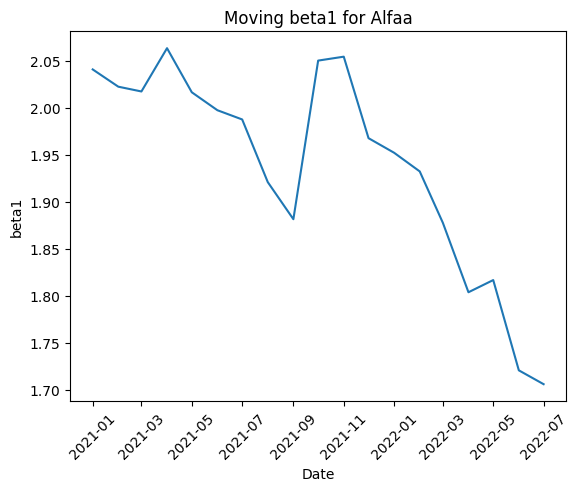

In [18]:
plt.clf()
plt.plot(betas['MXXret'])
plt.title('Moving beta1 for Alfaa')
plt.xlabel('Date')
plt.ylabel('beta1')
plt.xticks(rotation=45)
plt.show()

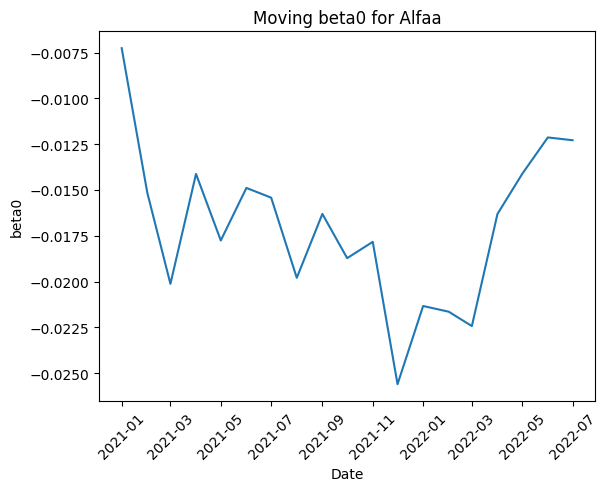

In [16]:
plt.clf()
plt.plot(betas['const'])
plt.title('Moving beta0 for Alfaa')
plt.xlabel('Date')
plt.ylabel('beta0')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [15]:
betas.describe()

,const,MXXret
count,19.000000,19.000000
mean,-0.017009,1.938544
std,0.004309,0.110510
min,-0.025598,1.706227
25%,-0.019957,1.879739
50%,-0.016308,1.967816
75%,-0.014503,2.020015
max,-0.007258,2.063498
